# Implementing linear regression  for future prediction

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# === Imports ===
import pandas as pd                              # For data manipulation
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.impute import SimpleImputer         # For handling missing values
from sklearn.linear_model import LinearRegression  # For building the regression model

# === Step 1: Load the dataset ===
df = pd.read_csv("exploratory_data.csv")
# Loads the CSV file into a DataFrame named df

# === Step 2: Select the desired features ===
selected_features = [
    'rolling_mean_3d',
    'rolling_mean_7d',
    'rolling_kurtosis_10d',
    'rolling_skew_7d',
    'rolling_skew_10d'
]
X = df[selected_features]  # Extract the selected columns as feature variables

# === Step 3: Define the target variable ===
y = df['sentiment_score']  # Replace 'target' with the actual target column name in your dataset

# === Step 4: Handle missing values in features ===
imputer = SimpleImputer(strategy='mean')  # Create an imputer to fill NaNs with the column mean
X_imputed = imputer.fit_transform(X)      # Fit the imputer on X and transform X to remove NaNs

# === Step 5: Split the dataset into training and testing sets ===
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed,          # Cleaned feature matrix with no NaNs
    y,                  # Target variable
    test_size=0.2,      # Use 20% of the data for testing
    random_state=42     # Set random seed for reproducibility
)

# === Step 6: Train a Linear Regression model ===
model = LinearRegression()     # Initialize the linear regression model
model.fit(X_train, y_train)    # Fit the model using training data


LinearRegression()

In [46]:
model = LinearRegression()
# Initializes a Linear Regression model from scikit-learn.

model.fit(X_train, y_train)
# Trains the Linear Regression model using the training data (features X_train and target y_train).
# The model learns the relationship between input features and the target variable.


LinearRegression()

In [47]:
y_pred = model.predict(X_test)
# Uses the trained regression model to predict target values (scores) for the test feature set X_test.
# 'y_pred' contains the model's estimated sentiment scores for unseen data,
# which can be compared against actual values for performance evaluation.


In [48]:
from sklearn.metrics import mean_squared_error, r2_score
# Import evaluation metrics for regression models from scikit-learn.

mse = mean_squared_error(y_test, y_pred)
# Calculate Mean Squared Error (MSE) between actual (y_test) and predicted (y_pred) values.
# MSE quantifies the average squared difference, so lower values indicate better fit.

r2 = r2_score(y_test, y_pred)
# Calculate the R-squared (coefficient of determination) score.
# R² indicates the proportion of variance in the dependent variable explained by the model.
# Values closer to 1 suggest a better fit.

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
# Output the MSE and R² scores formatted to four decimal places for clarity.


Mean Squared Error: 0.1139
R² Score: 0.3802


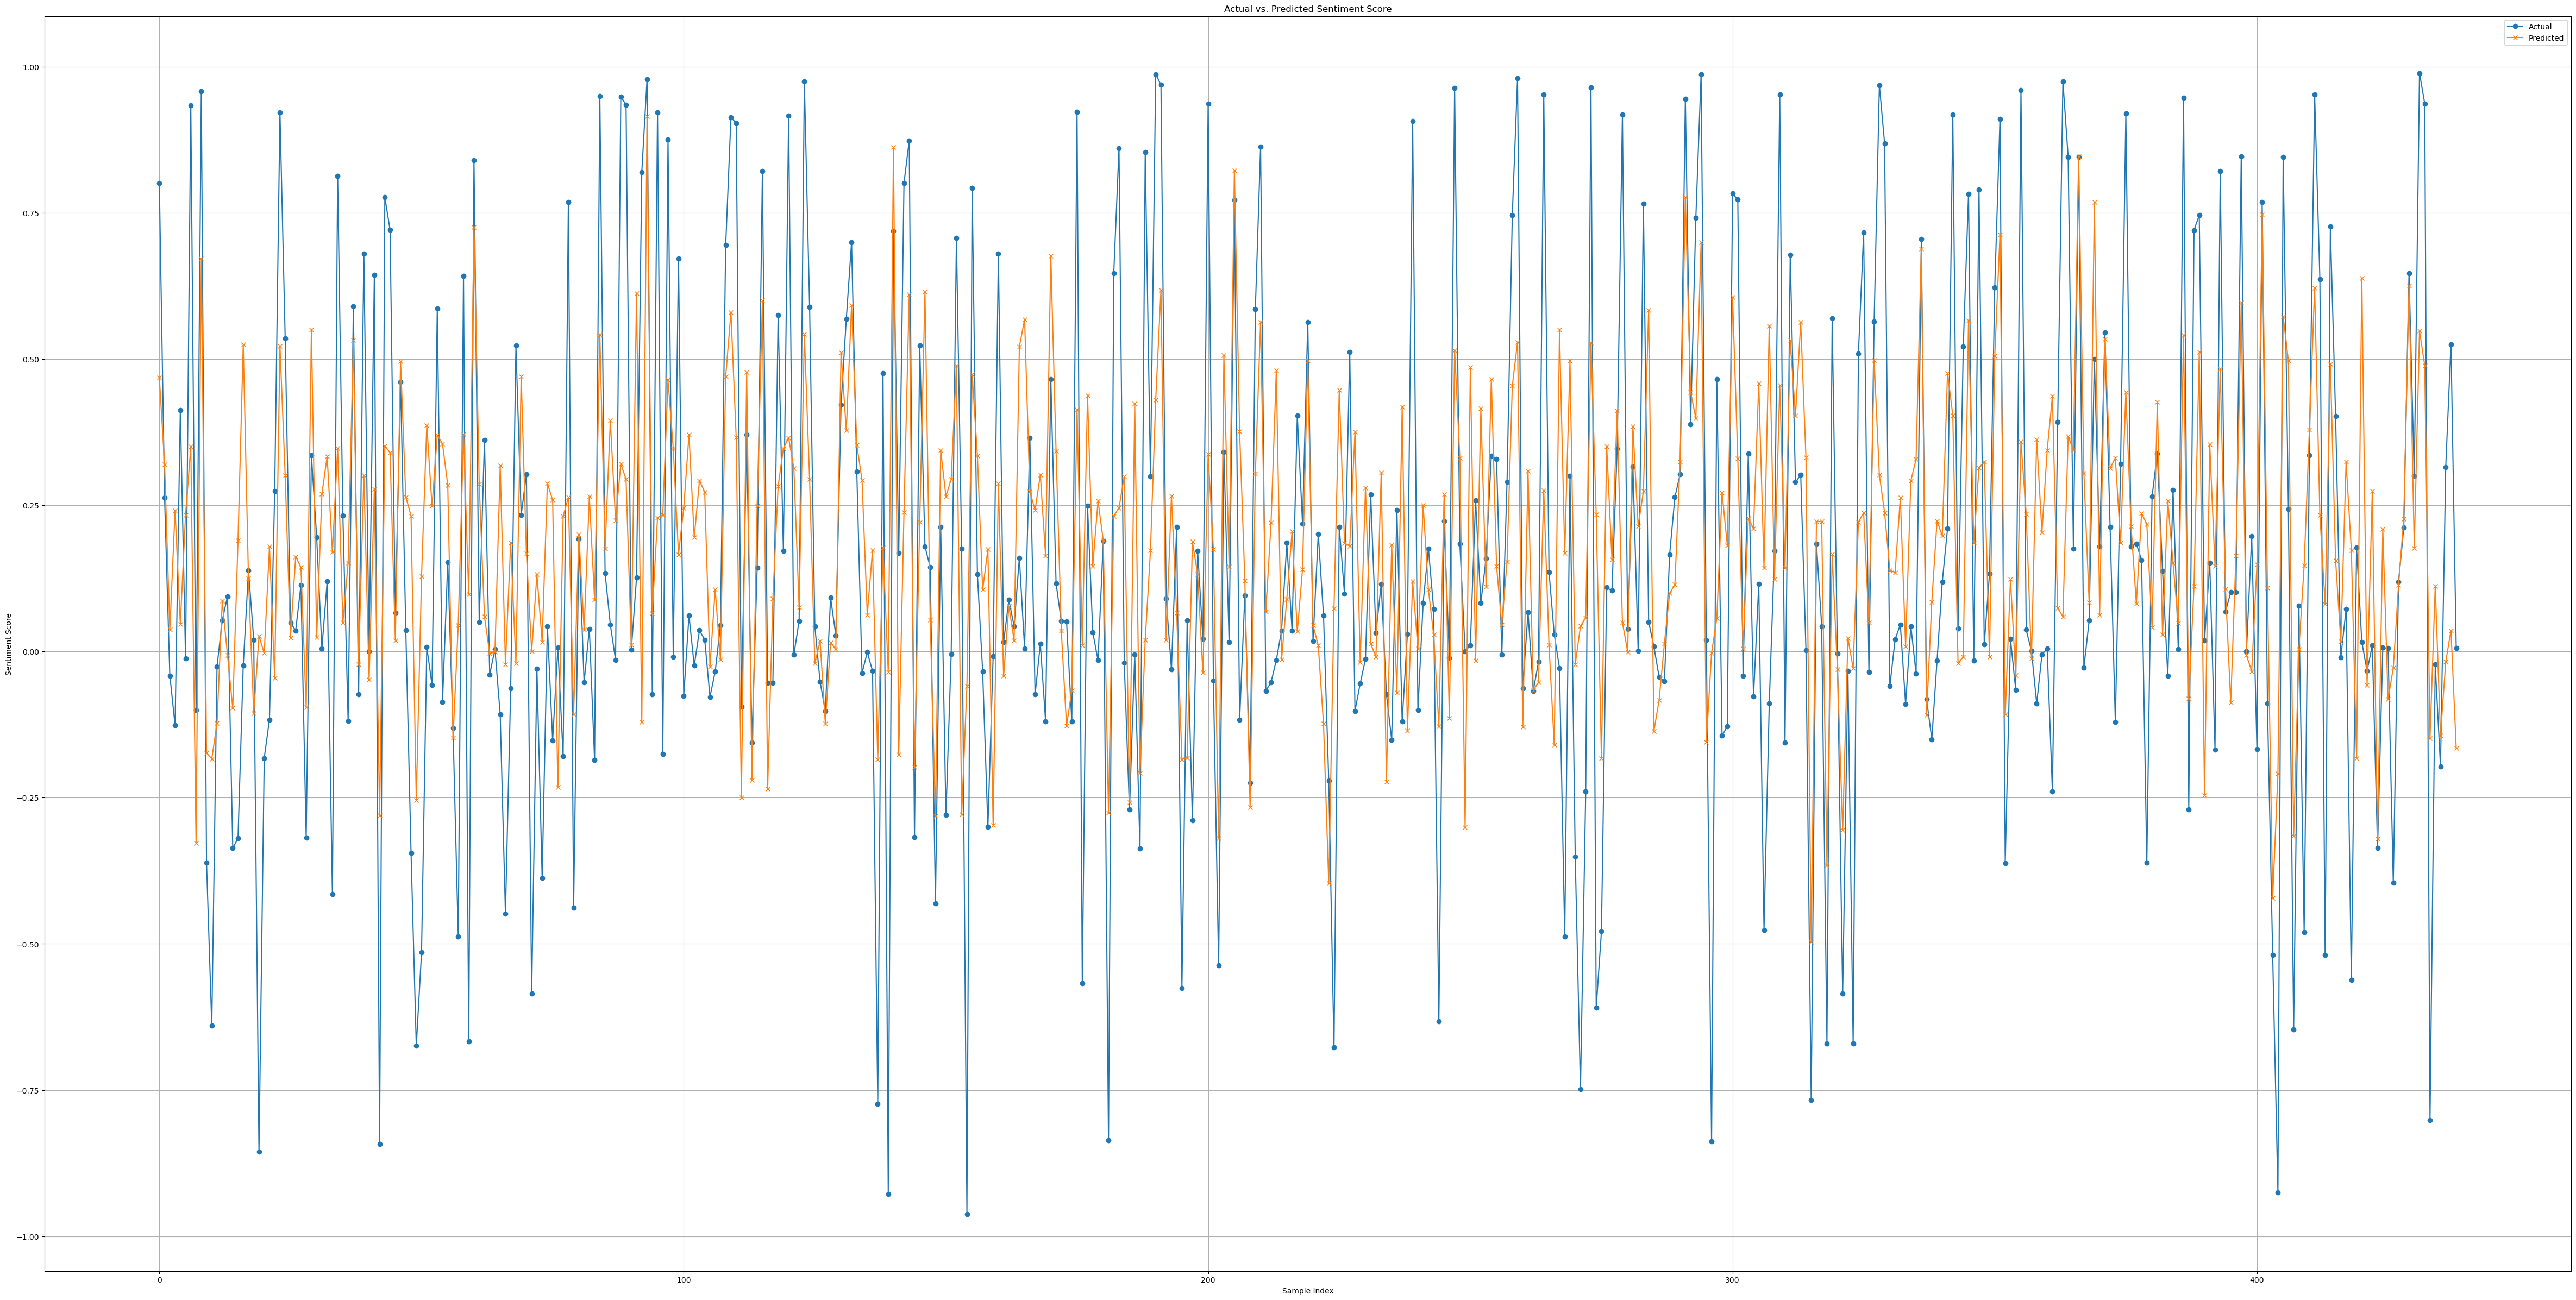

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 30))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Sentiment Score')
plt.xlabel('Sample Index')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


## future prediction

Mean Squared Error: 0.1139
R² Score: 0.3802


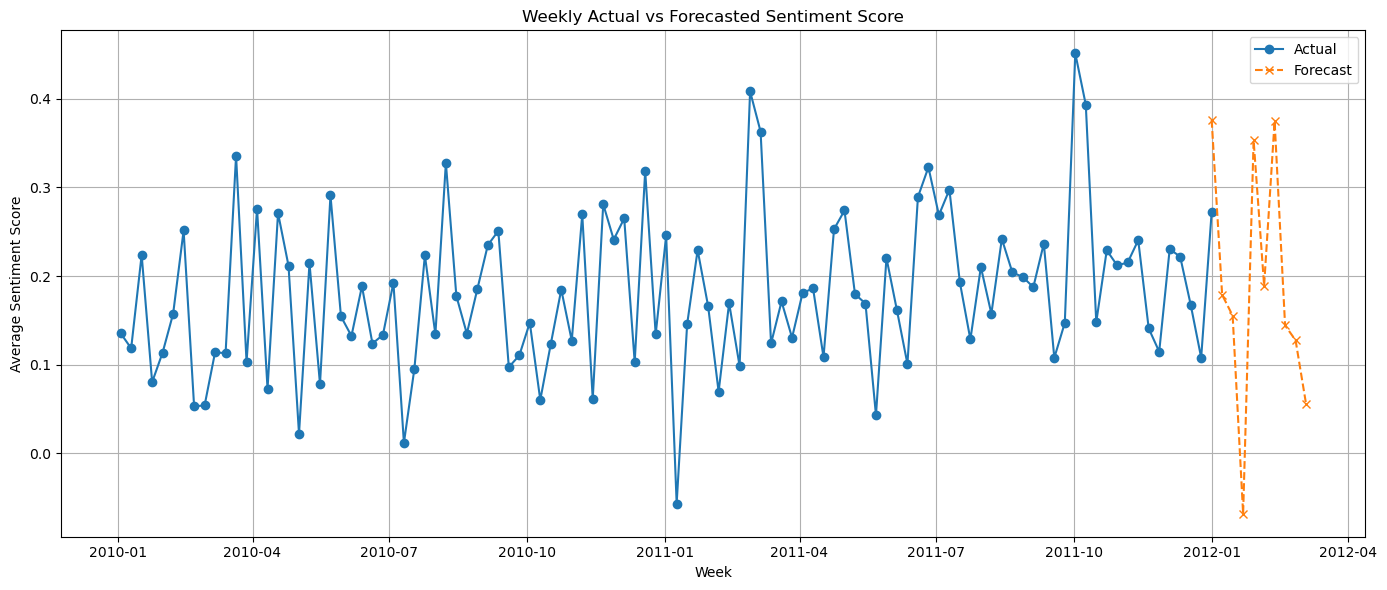

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load data ===
df = pd.read_csv("exploratory_data.csv")  # Load the CSV into a DataFrame

# === Step 2: Define features and target ===
selected_features = [
    'rolling_mean_3d',
    'rolling_mean_7d',
    'rolling_kurtosis_10d',
    'rolling_skew_7d',
    'rolling_skew_10d'
]
X = df[selected_features]               # Feature matrix
y = df['sentiment_score']              # Target variable

# === Step 3: Impute missing values ===
imputer = SimpleImputer(strategy='mean')  # Use mean to fill missing values
X_imputed = imputer.fit_transform(X)      # Fit-transform on feature matrix

# === Step 4: Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# === Step 5: Train model ===
model = LinearRegression()               # Initialize linear regression
model.fit(X_train, y_train)              # Train model on training data

# === Step 6: Evaluate model (optional) ===
y_pred = model.predict(X_test)           # Predict on test data
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

# === Step A: Generate future dates ===
future_dates = pd.date_range(
    start=pd.to_datetime(df['date']).max() + pd.Timedelta(days=1),  # Start after last date
    periods=60                                                       # Predict for next 60 days
)
future_df = pd.DataFrame({'date': future_dates})                     # Create future DataFrame

# === Step B: Fill in feature values using random sampling from last 30 days ===
recent_data = df[selected_features].tail(30)  # Get last 30 days of feature data
sampled_future = recent_data.sample(n=60, replace=True, random_state=42).reset_index(drop=True)
# Randomly sample 60 rows from last 30 (with replacement) for variety in prediction

# Assign sampled values to future DataFrame
for col in selected_features:
    future_df[col] = sampled_future[col]

# === Step C: Predict using trained model ===
X_future = imputer.transform(future_df[selected_features])  # Apply same imputer
future_df['sentiment_score'] = model.predict(X_future)      # Predict sentiment scores
future_df['type'] = 'forecast'                              # Label for plotting

# === Step D: Prepare historical actual data ===
df['date'] = pd.to_datetime(df['date'])                      # Ensure datetime format
actual_df = df[['date', 'sentiment_score']].copy()           # Keep relevant columns
actual_df['type'] = 'actual'                                 # Label for plotting

# === Step E: Combine actual and forecast ===
combined = pd.concat([actual_df, future_df], ignore_index=True)  # Merge actual and forecast

# === Step F: Weekly Aggregation and Plot ===
combined['date'] = pd.to_datetime(combined['date'])  # Ensure datetime
combined_weekly = combined.groupby(
    [pd.Grouper(key='date', freq='W'), 'type']        # Group by week and type
)['sentiment_score'].mean().reset_index()             # Average weekly sentiment

# Pivot data for plotting
pivot_weekly = combined_weekly.pivot(index='date', columns='type', values='sentiment_score')

# === Step G: Plotting ===
plt.figure(figsize=(14, 6))  # Set figure size
plt.plot(pivot_weekly.index, pivot_weekly['actual'], label='Actual', marker='o')    # Actual line
plt.plot(pivot_weekly.index, pivot_weekly['forecast'], label='Forecast', marker='x', linestyle='--')  # Forecast line

# Add plot labels and formatting
plt.title('Weekly Actual vs Forecasted Sentiment Score')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [54]:
X_future


array([[ 3.71831359e-01,  3.86932795e-01, -9.18857483e-01,
        -5.47055966e-01,  8.58305641e-02],
       [ 1.03475809e-01,  2.77552774e-02, -2.56021793e-01,
        -6.03608777e-02,  7.35888658e-01],
       [ 3.10248494e-01,  2.71321486e-01, -1.30268881e+00,
         4.66276190e-02,  3.34883025e-01],
       [-8.02427947e-02,  1.31417386e-01, -1.12857641e+00,
         8.75366439e-01,  7.48916086e-01],
       [ 4.79176078e-01,  3.67591161e-01, -1.24931387e+00,
        -3.23864199e-03, -2.27057847e-01],
       [ 2.65801170e-01,  2.55977598e-01, -9.04612580e-01,
        -2.14580712e-01,  8.01651210e-02],
       [ 3.10248494e-01,  2.71321486e-01, -1.30268881e+00,
         4.66276190e-02,  3.34883025e-01],
       [-1.71864989e-01, -4.05032254e-02, -9.54736537e-01,
         1.44526567e-02,  1.88500294e-01],
       [ 3.71831359e-01,  3.86932795e-01, -9.18857483e-01,
        -5.47055966e-01,  8.58305641e-02],
       [ 3.93534701e-01, -8.66832275e-02, -1.15683396e+00,
         6.52896044e-01

### Summary: